In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
import numpy as np
from sklearn.preprocessing import TargetEncoder

**Информация о датасете:**
Датасет был создан, чтобы выяснить, можно ли заменить дорогостояющую проверку сложных моделей процессов прогнозированием результатов аукциона.


---


Каждая строка датасета - один цикл проверки. Проверяем, возможна ли конкретная цена для конкретного товара, и может ли конкретный участник торгов выиграть товар по этой цене.

Фичи:


1.   process.b1.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 1.
2.   process.b2.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 2.
3.  process.b3.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 3.
4. process.b4.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 4.
5. property.price - Цена в данный момент подтверждена.
6. property.product - Продукт в настоящее время проверен.
7. property.winner - 	Участник торгов в настоящее время подтвержден как победитель продукта (0, если подтверждена только цена).
8. verification.result - Результат двоичной проверки - возможен ли проверенный результат?
9. verification.time - Время выполнения процедуры проверки.



**Для начала скачаем датасет и загрузим его в фрейм данных. Распечатаем первые 3 строки.**

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head(3)

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889


**Посмотрим статистическую информацию о данных**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


**Заметим, что нет ни одного пропущенного значения.**
**Посмотрим, какие столбцы имеются в нашем датасете.**

In [ ]:
data.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

**Количество строк и столбцов**

In [ ]:
data.shape

(2043, 9)

Визуализируем количественные данные

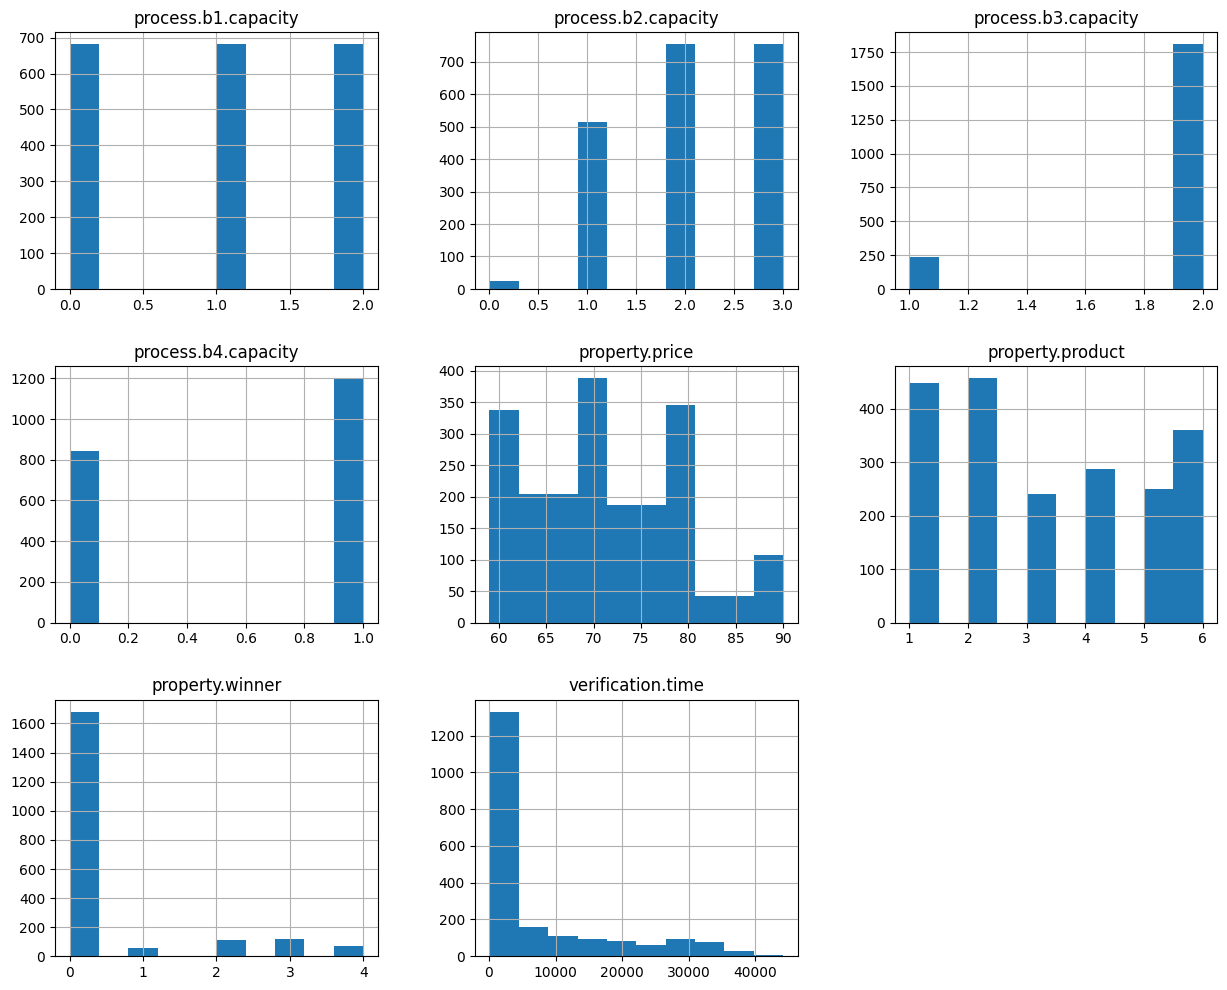

In [ ]:
data.hist(figsize=(15,12));

Визуализируем категориальные данные

([0, 1], [Text(0, 0, 'False'), Text(1, 0, 'True')])

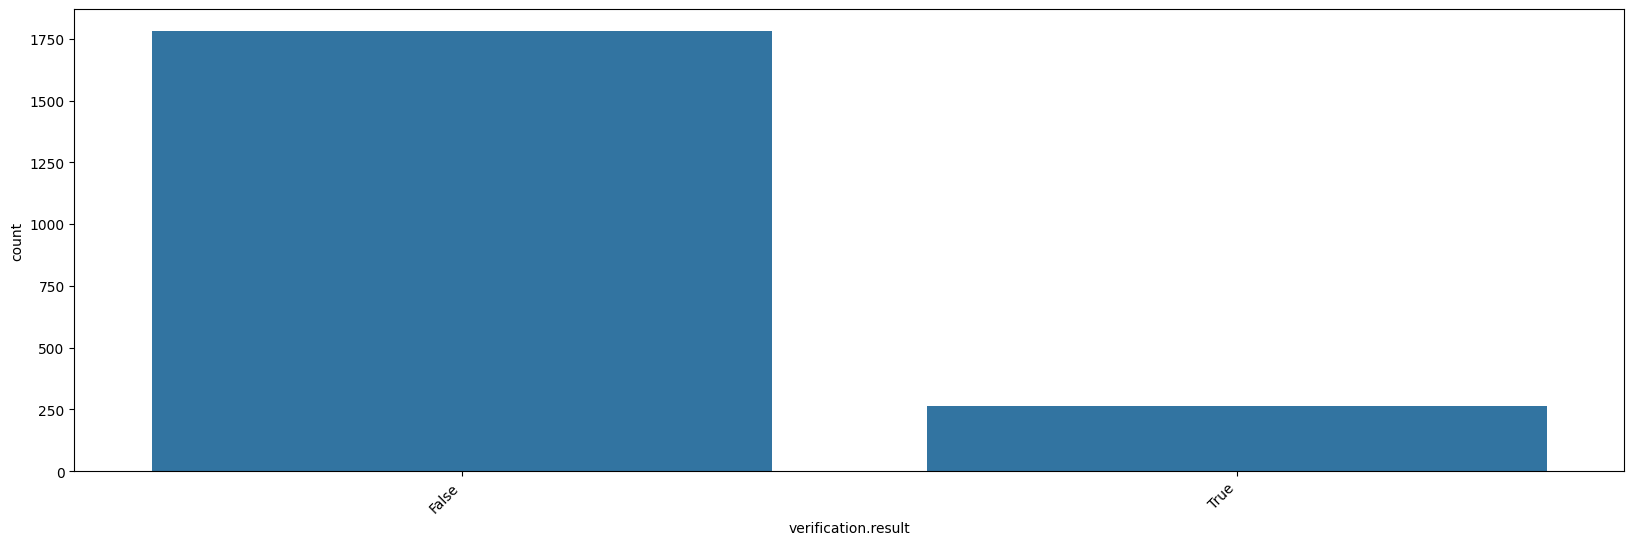

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['verification.result'])
plt.xticks(rotation=45, ha='right')


Проверим, есть ли связь между результатом и типом продукта

<Axes: xlabel='verification.result', ylabel='count'>

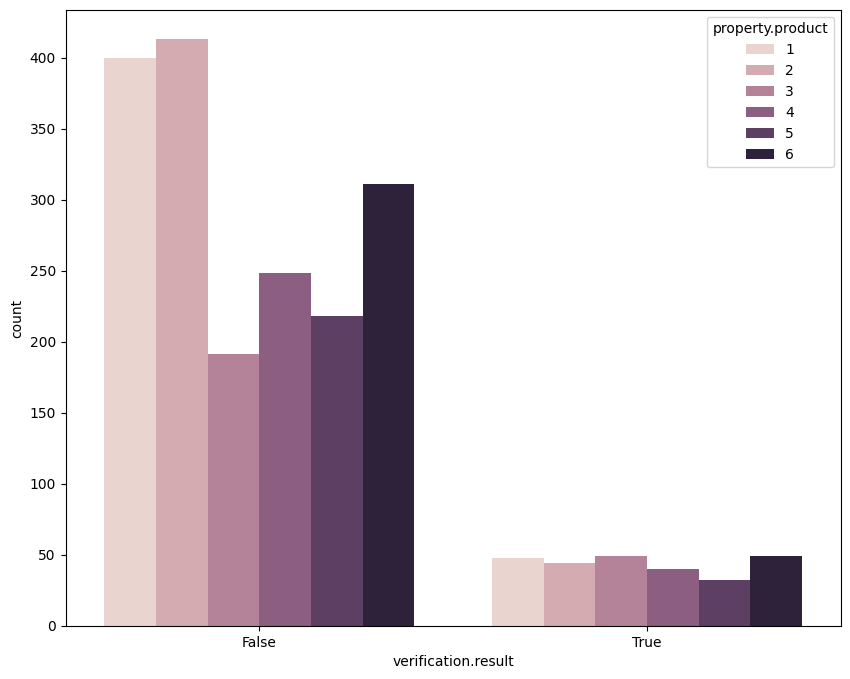

In [ ]:
sns.countplot(data=data, x="verification.result", hue='property.product')

Посмотрим, как распределяется продукт и цена на него

<Axes: xlabel='property.price', ylabel='Count'>

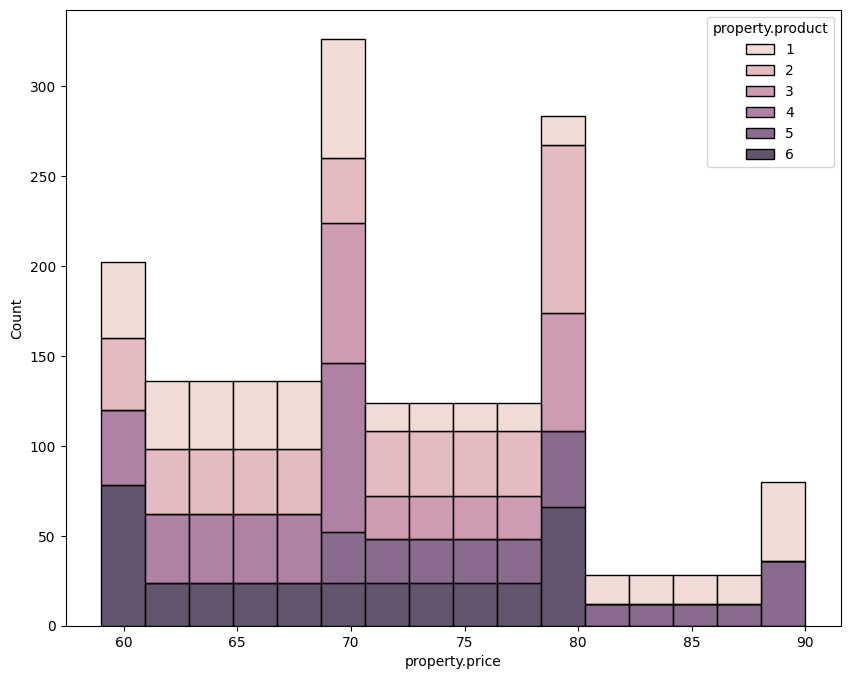

In [ ]:
sns.histplot(data, x="property.price", hue="property.product", multiple="stack")

Посмотрим ящик с усами (определим выбросы) - выбросов нет

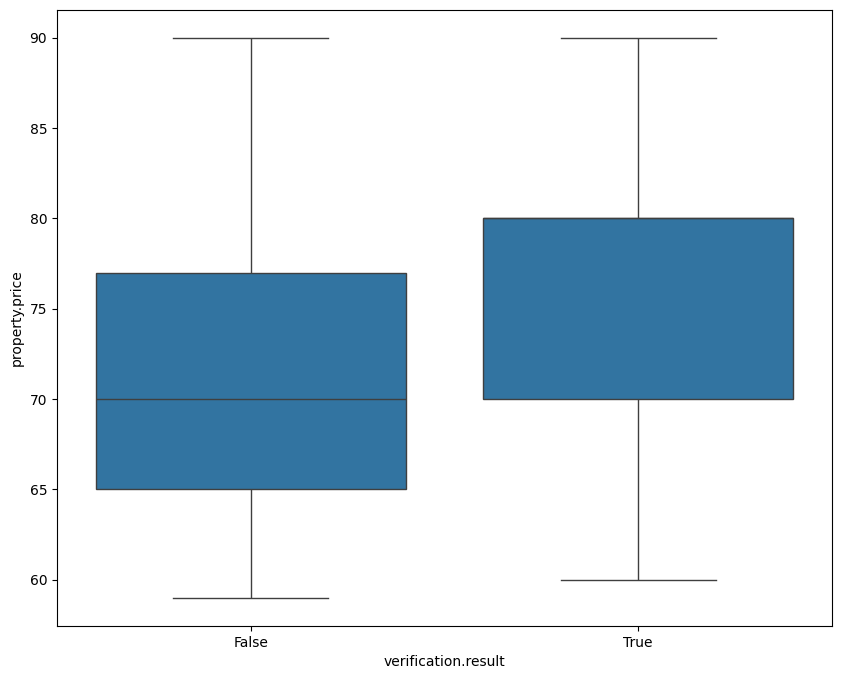

In [ ]:
sns.boxplot(data=data, y='property.price', x='verification.result');

Построим виолин плот, суть почти такая же, как и у ящика с усами

<Axes: xlabel='verification.result', ylabel='property.price'>

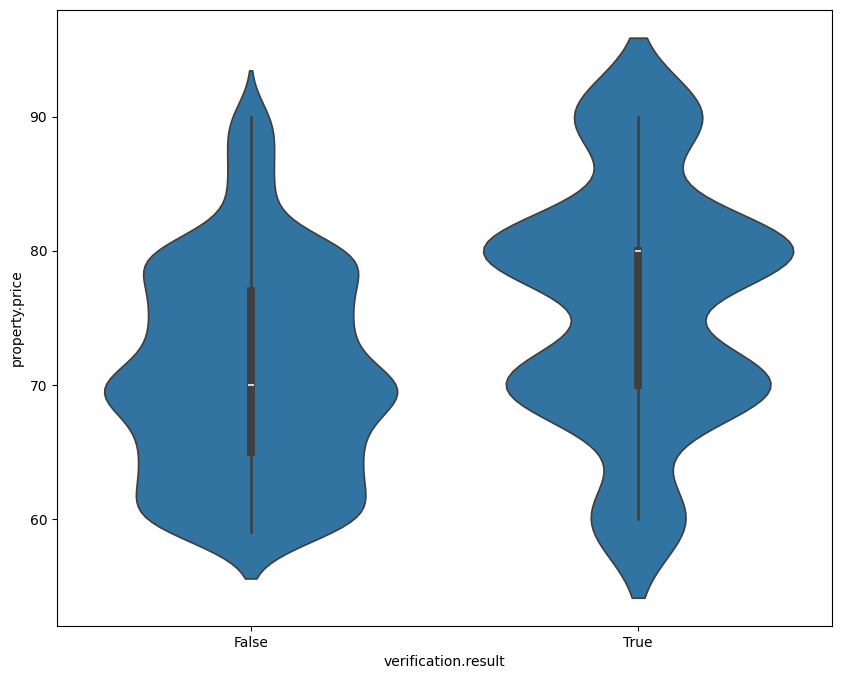

In [ ]:
sns.violinplot(x='verification.result', y='property.price', data=data)

Построим лайн плот, чтобы посмотреть, как зависит время на проверку от продукта

<Axes: xlabel='property.product', ylabel='verification.time'>

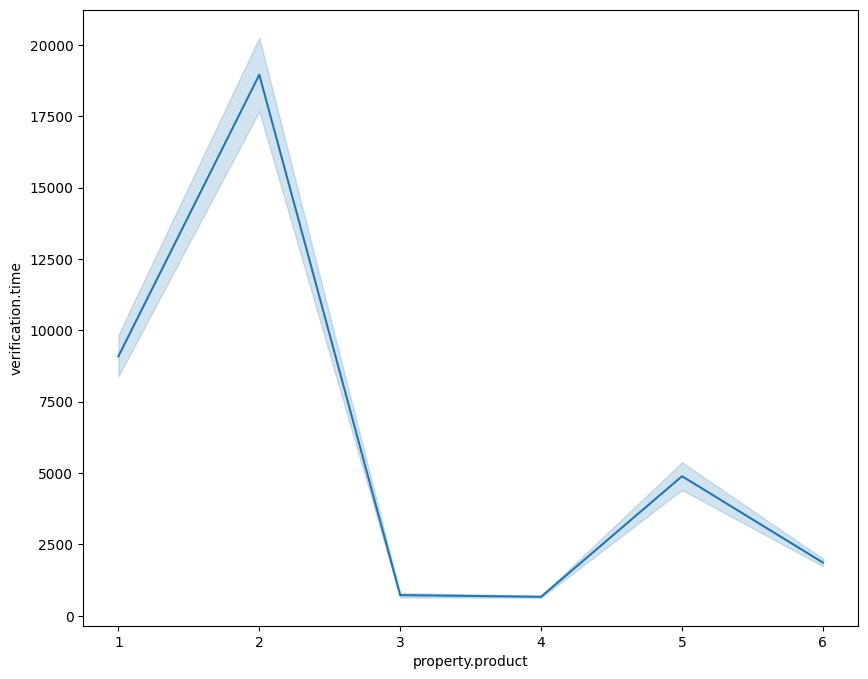

In [ ]:
sns.lineplot(data=data, x='property.product', y='verification.time')

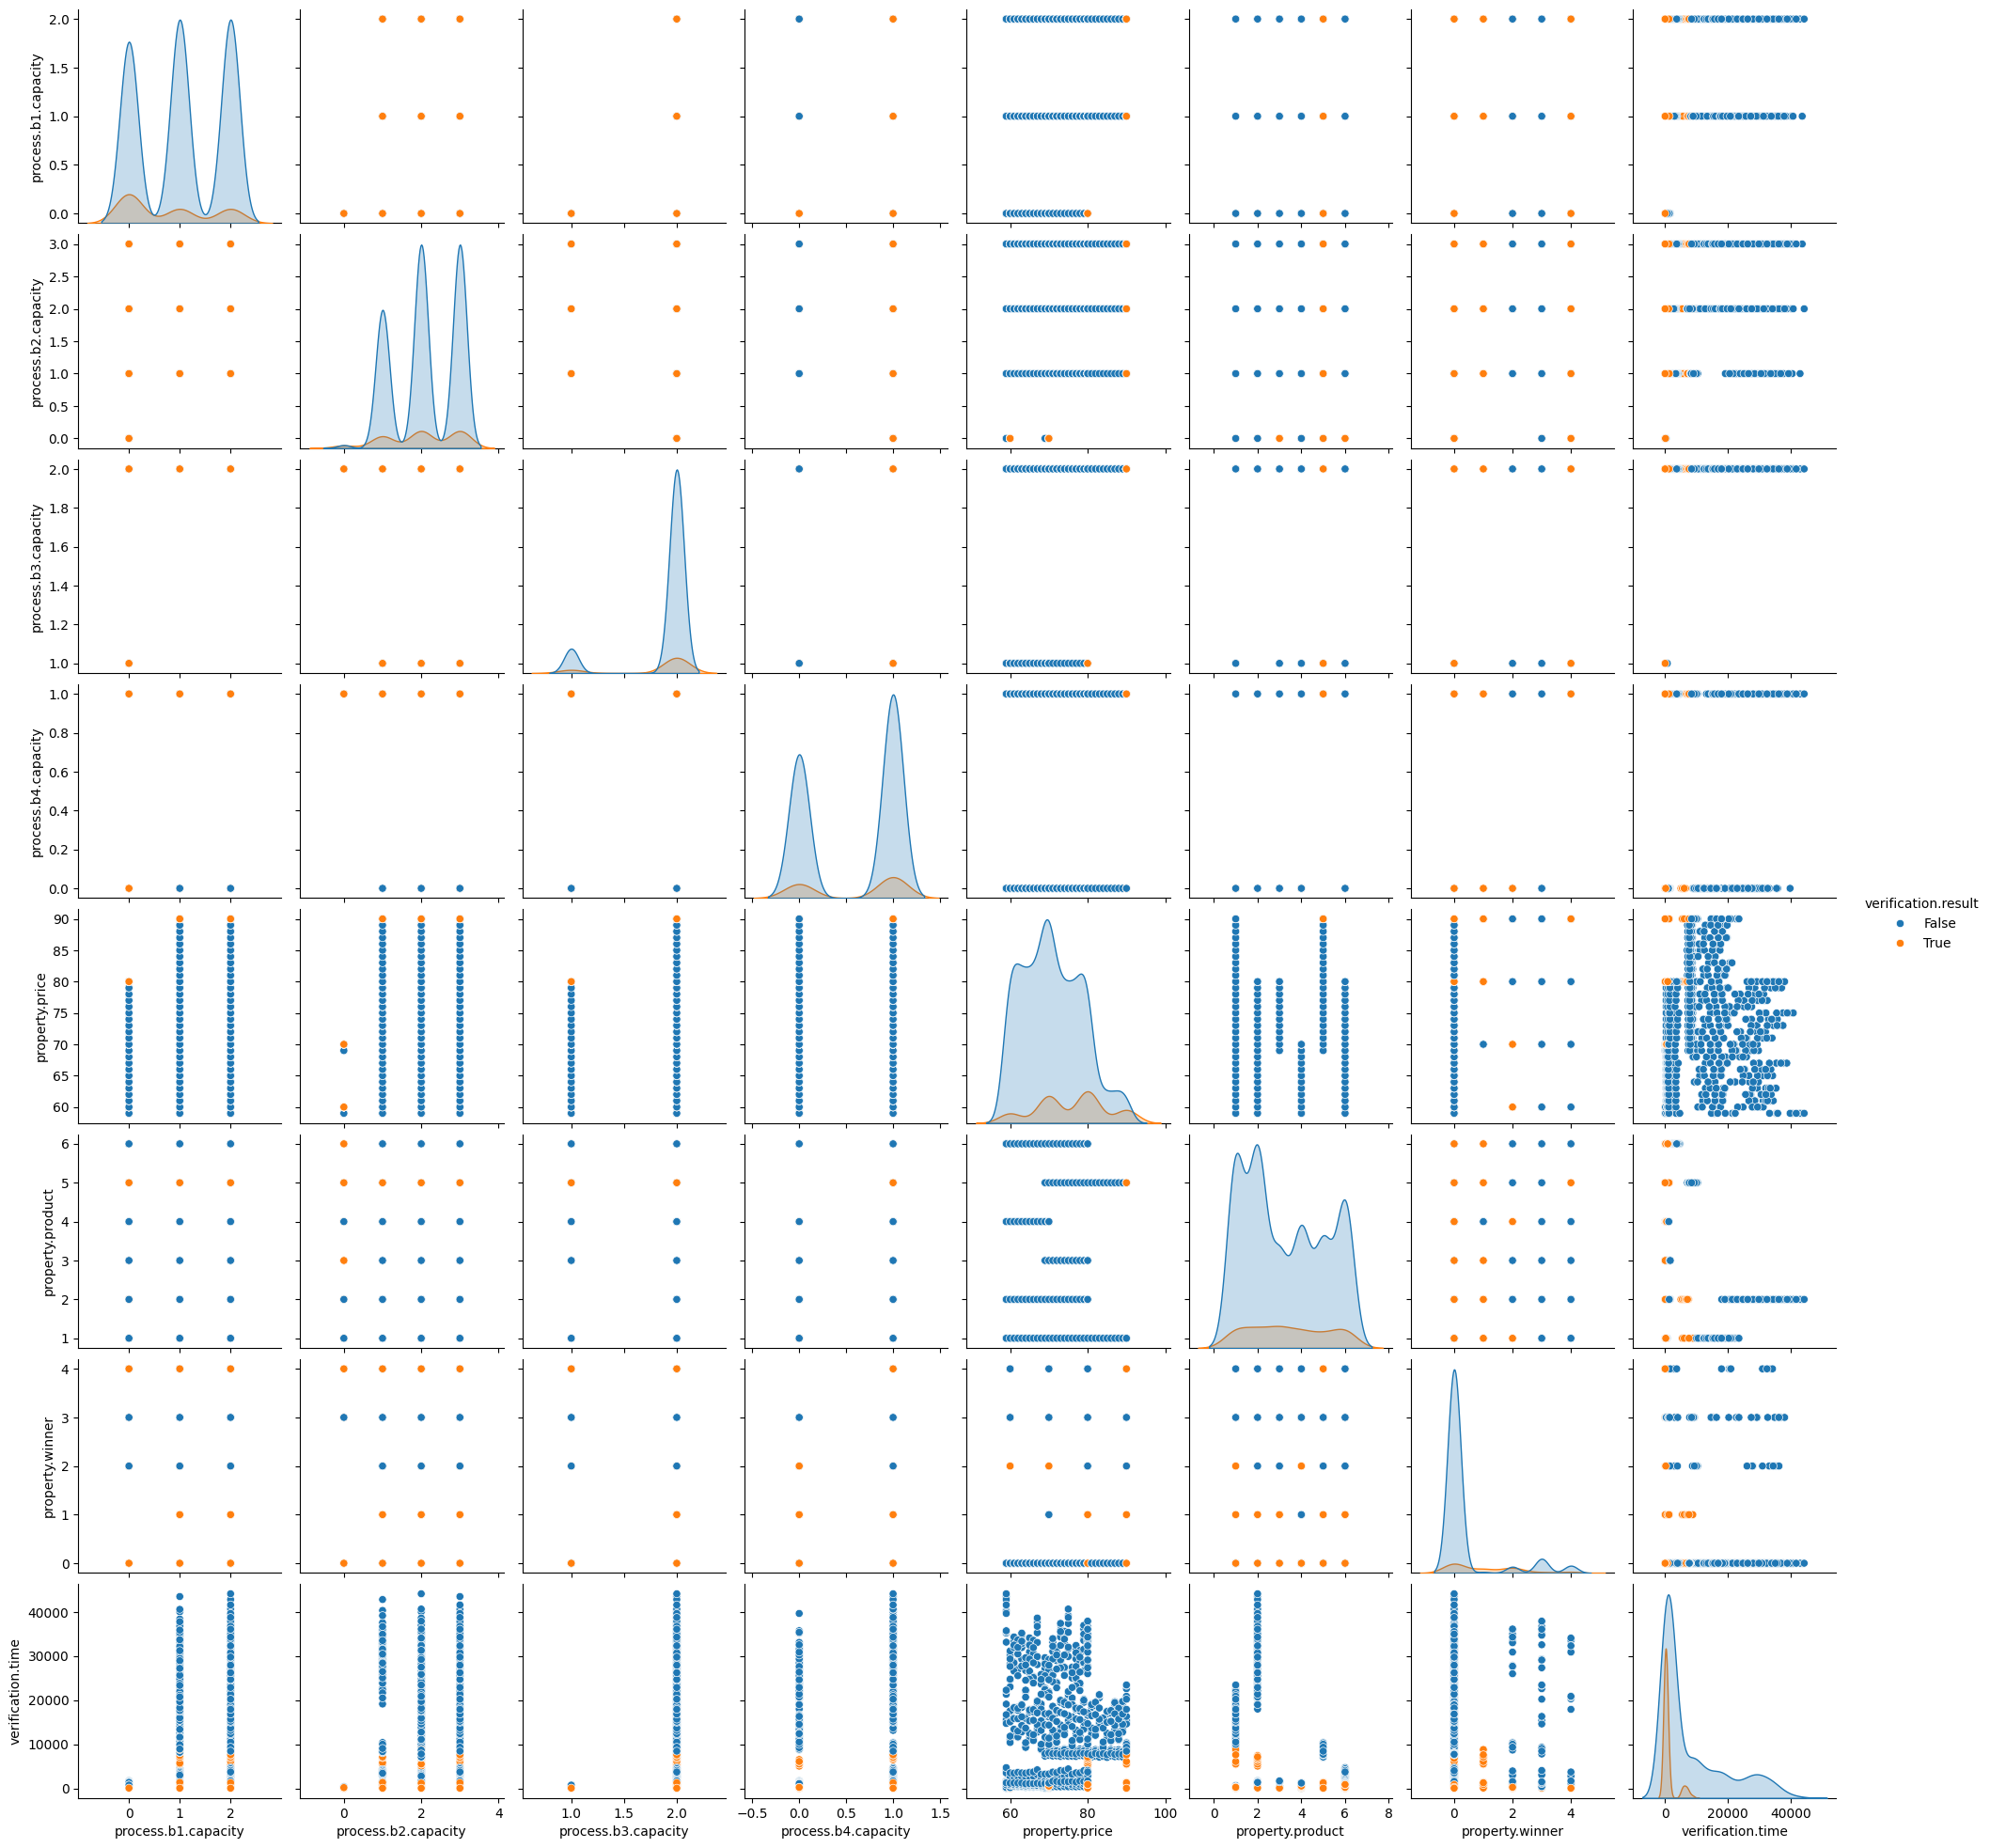

In [ ]:
sns.pairplot(data, kind="scatter", hue="verification.result")

Строим тепловую карту только для количественных данных

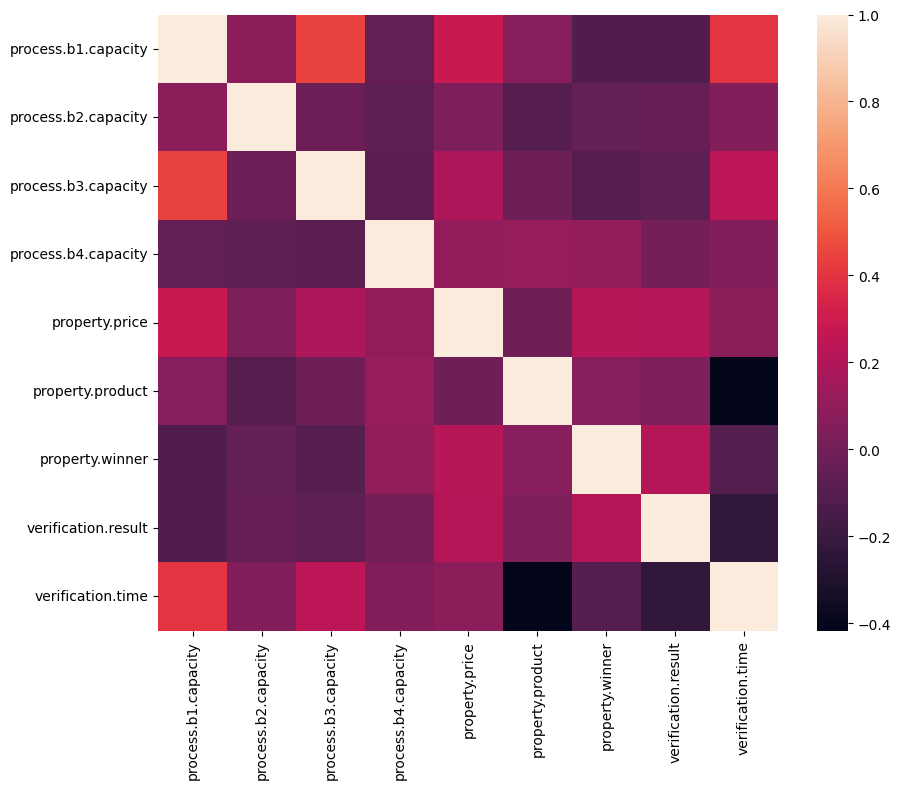

In [ ]:
sns.heatmap(data.corr(numeric_only = True))

Так как в датасете нет категориальных данных, то нам не придется кодировать их. Однако, в случае, если бы такие данные были, мы бы применили get_dummies для правильного кодирования категориальных признаков.

Закодируем таргет. Так как он состоит из 2-х значений: True и False, применим LabelEncoder

In [ ]:
le = LabelEncoder()

data['verification.result'] = le.fit_transform(data['verification.result'])

In [ ]:
data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667
